In [1]:
import os
from matplotlib import pyplot
from numpy import unique
from numpy import asarray
from numpy import argmax
from PIL import Image
import cv2
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

ModuleNotFoundError: No module named 'matplotlib'

In [2]:
current_dir = os.getcwd()
data_dir = "/numbers"
file_list = []
X = []
Y = []

for (root, directories, files) in os.walk(current_dir + data_dir):
    for file in files:
        if '.jpg' in file:
            file_path = os.path.join(root, file)
            file_list.append(file_path)
            Y.append(file[0])
for img in file_list:
    img_gray = Image.open(img).convert('L')
    img_gray = np.array(img_gray)
    img_gray = cv2.resize(img_gray, (256, 256))
    X.append(img_gray/255)

In [3]:
X = np.array(X)
Y = np.array(Y)
Y = Y.astype('uint8')

In [4]:
X = X.reshape(X.shape[0], X.shape[1], X.shape[2], 1)
in_shape = X.shape[1:]
n_classes = len(unique(Y))

In [5]:
# define model

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=in_shape))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=in_shape))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=in_shape))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=in_shape))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=in_shape))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))

model.add(Dense(n_classes, activation='softmax'))

2022-06-07 03:12:05.141955: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/jupyter-2014372039/.local/lib/python3.9/site-packages/cv2/../../lib64:
2022-06-07 03:12:05.141973: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-07 03:12:05.141988: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: 7c43499ccc34
2022-06-07 03:12:05.141992: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: 7c43499ccc34
2022-06-07 03:12:05.142074: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: NOT_FOUND: was unable to find libcuda.so DSO loaded into this program
2022-06-07 03:12:05.142103: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 

In [6]:
# model.summary() 모델 구조출력
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

In [7]:
# define loss and optimizer
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# configure early stopping
es = EarlyStopping(monitor='val_loss', patience=5)

# fit model
history = model.fit(X, Y, epochs=100, batch_size=5, verbose=1, validation_split=0.2, callbacks=[es])

Epoch 1/100
64/64 [==============================] - 13s 196ms/step - loss: 2.4822 - accuracy: 0.0812 - val_loss: 2.3067 - val_accuracy: 0.0875
Epoch 2/100
64/64 [==============================] - 12s 192ms/step - loss: 2.3079 - accuracy: 0.0844 - val_loss: 2.3018 - val_accuracy: 0.1125
Epoch 3/100
64/64 [==============================] - 12s 193ms/step - loss: 2.3106 - accuracy: 0.1063 - val_loss: 2.3060 - val_accuracy: 0.0875
Epoch 4/100
64/64 [==============================] - 12s 191ms/step - loss: 2.2624 - accuracy: 0.1281 - val_loss: 2.0947 - val_accuracy: 0.2875
Epoch 5/100
64/64 [==============================] - 12s 192ms/step - loss: 2.1367 - accuracy: 0.2156 - val_loss: 1.8582 - val_accuracy: 0.3000
Epoch 6/100
64/64 [==============================] - 12s 194ms/step - loss: 1.9137 - accuracy: 0.3219 - val_loss: 1.5058 - val_accuracy: 0.4625
Epoch 7/100
64/64 [==============================] - 12s 191ms/step - loss: 1.6729 - accuracy: 0.4375 - val_loss: 1.1564 - val_accuracy:

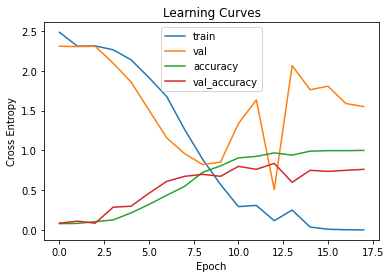

In [12]:
# plot learning curves
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.plot(history.history['accuracy'], label='accuracy')
pyplot.plot(history.history['val_accuracy'], label='val_accuracy')
pyplot.legend()
pyplot.show()

In [9]:
# evaluate the model
loss, acc = model.evaluate(X, Y, verbose=0)
print('loss: %.3f' % loss)
print('Accuracy: %.3f' % acc)

loss: 0.311
Accuracy: 0.952


Predicted: class=3


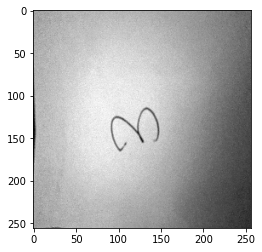

3
OK


In [41]:
################################
# make a prediction
import random
i = random.randrange(0, 399)
image = X[i]
yhat = model.predict(asarray([image]))
print('Predicted: class=%d' % argmax(yhat))

# data check 0~399
plt.imshow(X[i], cmap='gray')
plt.show()
print(Y[i])
if Y[i] == argmax(yhat):
    print("OK")
else:
    print("KO")
################################